The competition in the airline industry is at an all-time high due to the introduction of new airlines and expansion of existing services. Thus, to stay relevant in the industry it is crucial to understand the drivers of customer satisfaction for service improvements and effective marketing strategies. This analysis aims to analyze customer satisfaction within the airline industry, focusing on British Airways. By identifying factors influencing customer ratings and understanding seasonal booking trends, the analysis provides actionable insights that could enhance service delivery and customer experience.

The project follows a traditional data analysis methodology starting with data preprocessing, exploratory data analysis (EDA), and hypothesis testing to determine factors affecting customer satisfaction. The analysis was performed using Python. The data preprocessing of this dataset is challenging. So lets start the analysis


In [23]:
# This project is solution of the final Assessment for the subject Big Data Analytics (LD7186) which is taught under the course of MSC Big Data and Data Science Technology Northumbria University London Campus
# Developed by Muhammad Abrar

#Important Libraries

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette = 'Set2')          

In [24]:
#Loading Dataset
data_raw= pd.read_csv(r'Airline_Review.csv') # check pd.read_csv parameters to directly import the data in a right way

In [25]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passanger_Name  3580 non-null   object 
 1   Flying_month    2815 non-null   object 
 2   Route           2816 non-null   object 
 3   Rating          3575 non-null   float64
 4   Verified        1270 non-null   object 
 5   Review_title    3580 non-null   object 
 6   Review_content  3580 non-null   object 
 7   Traveller_type  3580 non-null   object 
 8   Class           3579 non-null   object 
dtypes: float64(1), object(8)
memory usage: 251.8+ KB


In [4]:
data_raw.sample(5)

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
1937,R Sanyal,16-Jul,LHR to ZRH,7.0,NaN,a matter-of-fact efficient trip,London Heathrow to Zurich - after reading all ...,Business,Business Class
985,David Ellis,Cape Town to London,First Class,9.0,Trip Verified,An excellent flight,Cape Town to London. I can report a positive e...,Boeing 747-400,Couple Leisure
3000,R Worton,23-Mar,London Heathrow to Munich,1.0,Trip Verified,a horror show of incompetence,The usual shambolic unfolding that BA has now ...,Family Leisure,Economy Class
2853,Mark Freyton,NaN,NaN,9.0,NaN,British Airways customer review,Got a wonderful cheap fare from London City to...,Economy Class,yes
1752,C Stratton,Seoul Incheon to London Heathrow,Business Class,6.0,NaN,BA is way behind other carriers,Verified Review Seoul Incheon to London Heat...,Boeing 787,Solo Leisure



# Data Preproccessing

In [26]:
#Checking Missing Values
data_raw.isnull().sum()

# Verified has 2310 missing values, this shows that majority of the records are null and dropping the column would be a great option for us.

Passanger_Name       0
Flying_month       765
Route              764
Rating               5
Verified          2310
Review_title         0
Review_content       0
Traveller_type       0
Class                1
dtype: int64

In [27]:
data = data_raw.drop('Verified', axis='columns')

# verified dropped

The data has severe inconcistency. The details can be found in the data preprocessing section of the project description. 

In [9]:

# Identify correct and incorrect records
correct_mask = data['Flying_month'].str.match(r'^\d{2}-[a-zA-Z]+$')

# Separate into different series
correct_flying_month = data.loc[correct_mask & ~data['Flying_month'].isna(), 'Flying_month']

# Display the results
print("Correct Flying month:")
print(correct_flying_month)


Correct Flying month:
1834    16-Jan
1835    17-Jan
1836    17-Jan
1837    17-Jan
1838    17-Jan
         ...  
3573    22-Dec
3574    22-Dec
3575    22-Dec
3576    22-Dec
3577    22-Dec
Name: Flying_month, Length: 947, dtype: object




---



# Data Correction


A Systemetic approach has been followed. The correct values of each column is identified using regex and boolean array and the identified values are then moved to the correct column.

In [28]:
# Creating copy of origional data
data_new = data.copy()



In [11]:
#Regular Expressions for all columns

# For Correct Data of Flying Month '^\d{2}-[a-zA-Z]+
# For Correct Data of Aircraft Type '[A-Z]*\d'
# For Correct Data of Route         'to+'
# For Correct Data of Class         'Class' | 'Premium Economy'

Populating **Flying Month** with valid values from every other column

In [ ]:
#Looking for all valid data of the form (22-DEC) in other columns and transfering it to flying_month.

# 1. Boolean Array for correct values in the Flying Month
mask_fl = data.Flying_month.str.contains(pat='^\d{2}-[a-zA-Z]+$') #data.Flying_month.str.match(r'^\d{2}-[a-zA-Z]+$')  using regular expression


#print(data[mask_fl & ~data.Flying_month.isna()])

#2. Boolean Array for Route column that has flying month values
mask_rt_fl = data.Route.str.contains(pat='^\d{2}-[a-zA-Z]+$')

#3. Boolean Array for Route column that has flying month values
mask_cl_fl = data.Class.str.contains(pat='^\d{2}-[a-zA-Z]+$')

#print(data.loc[mask_cl_fl & ~data.Route.isna()]) # This returns empty dataset which means that it contains no value that is related to flying month.

#Copying all values into the new column for flying month [Valid Value (flying month and Route) --> New Flying Month]
data_new.loc[mask_fl & ~data.Flying_month.isna(), 'NewFlying_month'] = data_new.Flying_month  # Correct values from flying Month


data_new.loc[mask_rt_fl & ~data.Route.isna(), 'NewFlying_month'] = data_new.Route # Correct Values from Route Column into New Flying Month

data_new.loc[mask_rt_fl & ~data.Route.isna(), 'Route'] = np.nan   # Replace values of route that are related to flying month with nan values.


Traveller Type Fixing

In [ ]:
mask_tr = data_new.Traveller_type.str.contains(pat='[A-Z]*\d')  #Get all charachters in range alphabets plus any numbers (Aircraft Carrier)



data_new.loc[mask_tr & ~data_new.Traveller_type.isna(), 'Aircraft_type'] = data_new.Traveller_type # copy into new column Aircraft_type
data_new.loc[mask_tr & ~data_new.Traveller_type.isna(), 'Traveller_type'] = np.nan

Populating **Route** with valid values from every other column

In [ ]:
mask_fl_rt = data.Flying_month.str.contains(pat="to+") #get all route values from flying_month to ROute
#print(mask_fl_rt.sum())

#boolean array for Traveller_type to Route
mask_Tr_rt = data_new.Traveller_type.str.contains(pat="to+")
print(mask_Tr_rt.sum())

#boolean array for Class to Route
mask_cl_rt = data_new.Class.str.contains(pat="to+")
print(mask_cl_rt.sum())

#Copying all relevante to Route
data_new.loc[mask_fl_rt & ~data_new.Flying_month.isna(), 'Route'] = data_new.Flying_month
data_new.loc[mask_Tr_rt & ~data_new.Traveller_type.isna(), 'Route'] = data_new.Traveller_type
data_new.loc[mask_cl_rt & ~data_new.Class.isna(), 'Route'] = data_new.Class

#Filling Class with nan for route values
data_new.loc[mask_cl_rt & ~data_new.Class.isna(), 'Class'] =np.nan


Populating Class column from all other columns

In [ ]:

mask_tr_cl = data.Traveller_type.str.contains('Class') | data.Traveller_type.str.contains(pat='Premium Economy', case=False )
#765 cases found when checked in excel, this is exactly right. Traveller to Class


#mask_tr_cl.sum()

data_new.loc[mask_tr_cl & ~data_new.Class.isna(), 'Class'] = data_new.Traveller_type

# Class to Traveller

mask_cl_tr = data_new.Class.str.contains('Leisure') | data.Class.str.contains(pat='Business$', regex=True)



data_new.loc[mask_cl_tr & ~data_new.Class.isna(), 'Traveller_type'] = data_new.Class

data_new.loc[mask_cl_tr & ~data_new.Class.isna(), 'Class'] =np.nan



data_new.loc[mask_tr_cl & ~data_new.Traveller_type.isna(), 'Traveller_type'] = np.nan




print((mask_tr_cl & ~data_new.Class.isna()).sum())

print(mask_tr_cl.sum())



In [34]:
data_new.loc[~data_new.Traveller_type.isna() & data_new.Traveller_type.str.contains(pat='no'),'Traveller_type'] = np.nan

In [35]:
# Final Changes NewFlyingmonth to Flying Month , Adding Verified again to the final dataset.

data_new['Flying_month'] = data_new['NewFlying_month']
data_new.drop(['NewFlying_month'], axis=1, inplace=True )
data_new['Verified'] = data_raw.Verified
data_new

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Aircraft_type,Verified
0,D Brown,NaN,Buenos Aires to Heathrow,9.0,British Airways customer review,Very good flight in Club World from start to f...,Business,NaN,777,NaN
1,S Mayir,NaN,San Francisco to London,1.0,Cramped uncomfortable seats,San Francisco to London. Terrible service and ...,Couple Leisure,NaN,777,Trip Verified
2,H Warner,NaN,St Lucia to Gatwick,1.0,both involuntarily downgraded,St Lucia to Gatwick on which my wife and I wer...,Couple Leisure,NaN,777,Trip Verified
3,G Mantimo,NaN,LHR to YYC,3.0,experience has really declined,Verified Review The British Airways experien...,Family Leisure,NaN,787,NaN
4,Scott Harris,NaN,LHR to ARN,6.0,behind their competitors,London to Stockholm flight was delayed a littl...,Family Leisure,NaN,767-300,NaN
...,...,...,...,...,...,...,...,...,...,...
3575,Martin McCormack,22-Dec,Dublin to Orlando via Heathrow,1.0,one of the worst experiences,This was literally one of the worst experience...,Solo Leisure,Economy Class,NaN,Not Verified
3576,R Marton,22-Dec,London to Phoenix,5.0,luggage was finally delivered on Thursday,Missing baggage customer service was the worst...,Solo Leisure,Premium Economy,NaN,Trip Verified
3577,S Marton,22-Dec,London Heathrow to Frankfurt,1.0,minimal communication from their team,Absolutely terrible experience with British Ai...,Solo Leisure,Economy Class,NaN,Trip Verified
3578,Tom Moore,NaN,Los Angeles to London to Paris to Rome,1.0,British Airways customer review,Overall good experience. BA owns Vueling/Iberi...,Solo Leisure,NaN,NaN,NaN


All the columns have valid data now Now moving towards Step 2 which is Data Cleaning and missing data

---



# Checking Missing Values

**Handling Missing Values**

In [36]:
data_new.isnull().sum()

Passanger_Name       0
Flying_month      2633
Route              769
Rating               5
Review_title         0
Review_content       0
Traveller_type     766
Class             1862
Aircraft_type     1728
Verified          2310
dtype: int64

C:\Users\mabra\AppData\Local\Temp\ipykernel_10784\3911070049.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=percent.values, y=percent.index, palette='Set2')


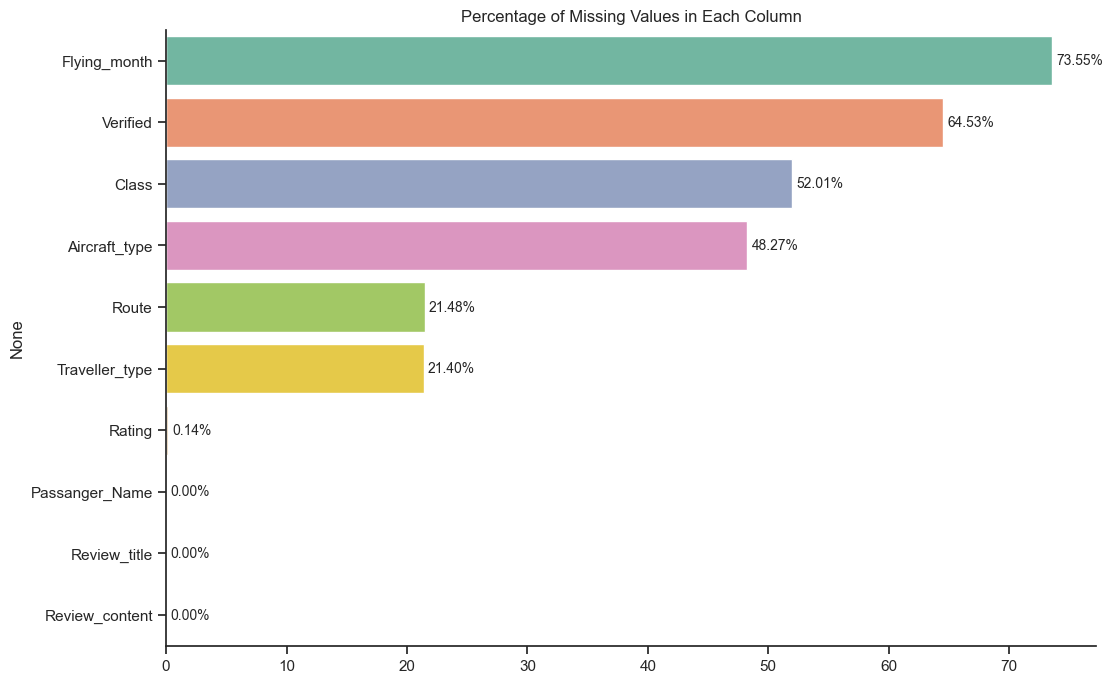

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of missing values for each column
missing_values = data_new.isnull().mean()
percent = missing_values * 100
percent.sort_values(inplace=True, ascending=False)

# Create bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=percent.values, y=percent.index, palette='Set2')

# Annotate each bar with the percentage of missing values
for bar in barplot.patches:
    barplot.annotate(format(bar.get_width(), '.2f') + '%',
                     (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                     ha='left', va='center',
                     size=10, xytext=(3, 0),
                     textcoords='offset points')

# Set the title and show the plot
plt.title('Percentage of Missing Values in Each Column')
plt.show()

**Extracting Dates from Reviews and filling Flying month column in order to fill As much missing values as possible**

**Convert the values extracted from reviews to standard format of flying month**

In [41]:
import re
from dateutil.parser import parse

def convert_to_standard_format(date_str):
    if pd.notna(date_str):
        try:
            # Convert to datetime and then format as "YY-Mon" (e.g., "19-Apr")
            return parse(date_str).strftime("%y-%b")
        except ValueError:
            # In case of parsing error, return None
            return None
    else:
        return None

# Apply the conversion to the 'New_Flying_month' column
data_new['New_Flying_month'] = data_new['New_Flying_month'].apply(convert_to_standard_format)

# **Now Merging Flying Month and New Flying Month to Fill the NAN Values with New Flying Month Values that are extracted dates from reviews**

# Replace NaN or empty values in 'Flying_month' with values from 'New_Flying_month'
data_new['Flying_month'] = data_new['Flying_month'].combine_first(data_new['New_Flying_month'])

# Optionally, if you want to remove the 'New_Flying_month' column afterwards
data_new = data_new.drop(columns=['New_Flying_month'])

# Show the updated dataframe
#data_new.head()

mask = ~data_new.Flying_month.isna()
print(data_new.Flying_month.loc[mask])

51      18-Dec
182     22-Apr
256     16-May
334     17-Apr
338     22-Oct
         ...  
3573    22-Dec
3574    22-Dec
3575    22-Dec
3576    22-Dec
3577    22-Dec
Name: Flying_month, Length: 1030, dtype: object


C:\Users\mabra\AppData\Local\Temp\ipykernel_10784\3911070049.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=percent.values, y=percent.index, palette='Set2')


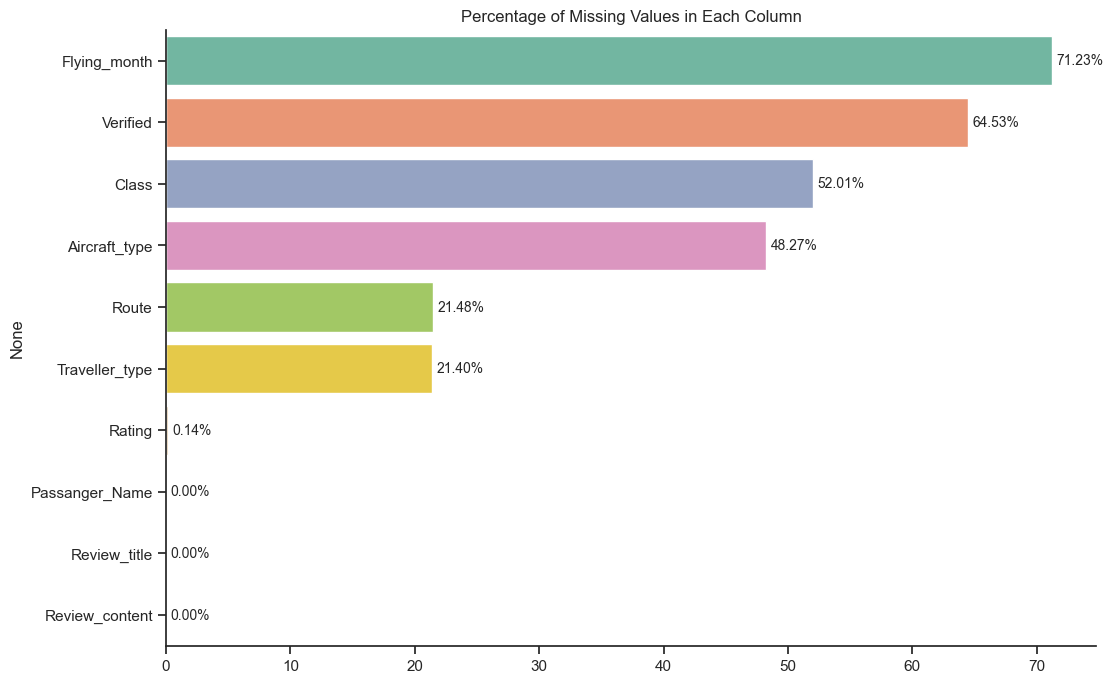

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of missing values for each column
missing_values = data_new.isnull().mean()
percent = missing_values * 100
percent.sort_values(inplace=True, ascending=False)

# Create bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=percent.values, y=percent.index, palette='Set2')

# Annotate each bar with the percentage of missing values
for bar in barplot.patches:
    barplot.annotate(format(bar.get_width(), '.2f') + '%',
                     (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                     ha='left', va='center',
                     size=10, xytext=(3, 0),
                     textcoords='offset points')

# Set the title and show the plot
plt.title('Percentage of Missing Values in Each Column')
plt.show()

# Handling Duplicate Values

In [44]:
duplicate_rows = data_new.duplicated().sum()

duplicate_rows

74

In [45]:
# Removing duplicates
df_no_duplicates = data_new.drop_duplicates()

# Shape of the dataset before and after removing duplicates
shape_before = data_new.shape
shape_after = df_no_duplicates.shape

print('Shape Before :',shape_before)
print ('Shape After :',shape_after)


Shape Before : (3580, 10)
Shape After : (3506, 10)


# Exploratory Data Analysis

In [ ]:
data_new.describe(include=object)

,Passanger_Name,Flying_month,Route,Review_title,Review_content,Traveller_type,Class,Aircraft_type,Verified
count,3580,1038,2811,3580,3580,2814,1718,1852,1270
unique,2764,112,1534,2570,3506,4,4,191,2
top,David Ellis,15-Sep,London to Johannesburg,British Airways customer review,I have used British Airways over a number of y...,Couple Leisure,Economy Class,A320,Trip Verified
freq,44,25,16,952,2,949,1003,342,1067


**Distribution of Ratings:**

This histogram shows how the ratings are distributed. The use of a Kernel Density Estimate (KDE) provides a smooth estimate of the distribution. From the graph, you can observe the central tendency and dispersion of ratings.
Count of Reviews per Class:

This bar chart displays the number of reviews for each class. It helps in understanding which classes are most reviewed, indicating their popularity or the volume of passengers.
These visualizations are effective in conveying the general distributions and characteristics of the dataset

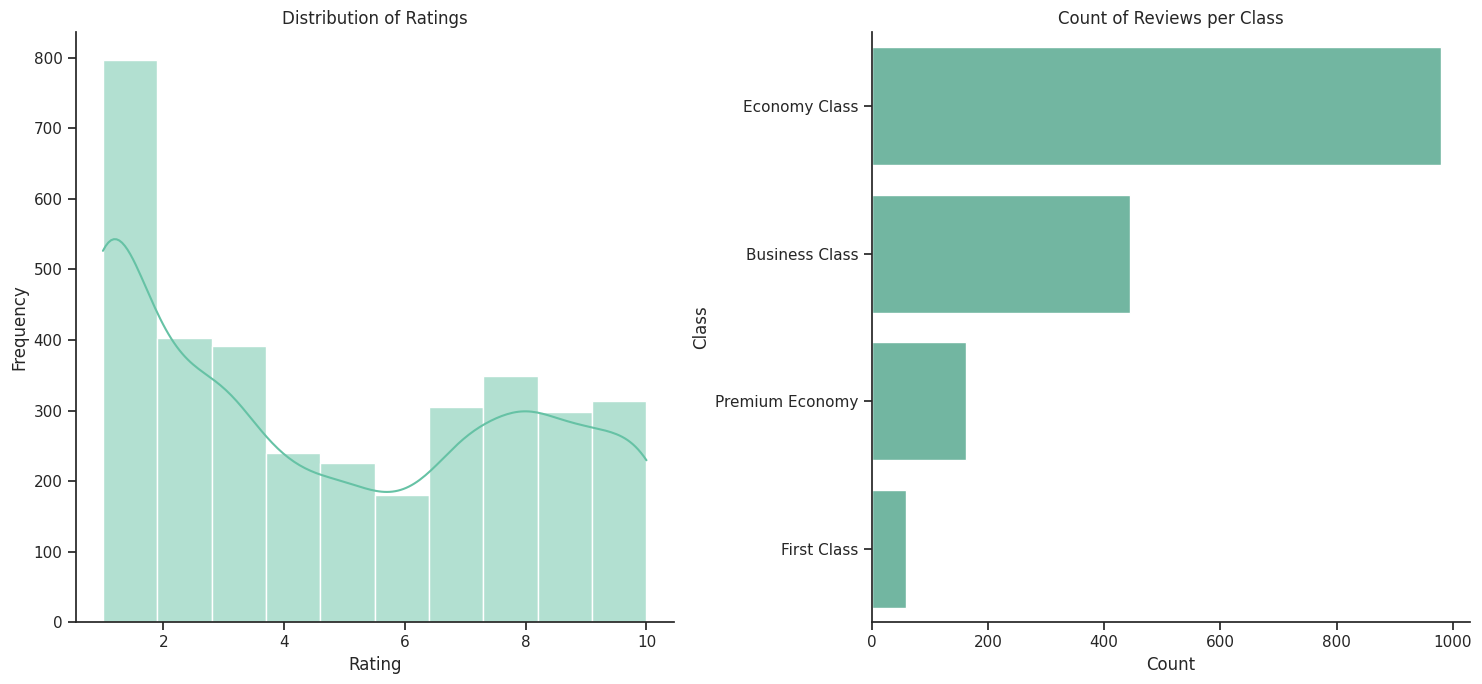

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the matplotlib figure
plt.figure(figsize=(15, 7))

# Distribution of Ratings
plt.subplot(1, 2, 1)
sns.histplot(df_no_duplicates['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Count of Reviews per Class
plt.subplot(1, 2, 2)
sns.countplot(y='Class', data=df_no_duplicates, order = df_no_duplicates['Class'].value_counts().index)
plt.title('Count of Reviews per Class')
plt.xlabel('Count')
plt.ylabel('Class')

# Adjust layout
plt.tight_layout()
plt.show()

# Note: Additional visualizations can be created for other variables as needed.


# 1. Identify the factors affecting customer choices.

In [ ]:
# Analyzing correlation of 'Rating' with 'Traveller_type', 'Class', 'Aircraft_type', and 'Verified'
# Since these are categorical variables, we will use groupby to understand their impact on average ratings
avg_rating_by_traveller_type = data_new.groupby('Traveller_type')['Rating'].mean()
avg_rating_by_class = data_new.groupby('Class')['Rating'].mean()
avg_rating_by_aircraft = data_new.groupby('Aircraft_type')['Rating'].mean()
avg_rating_by_verified = data_new.groupby('Verified')['Rating'].mean()

<ipython-input-128-4a7ada1c1155>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_traveller_type.index, y=avg_rating_by_traveller_type.values , palette='GnBu')


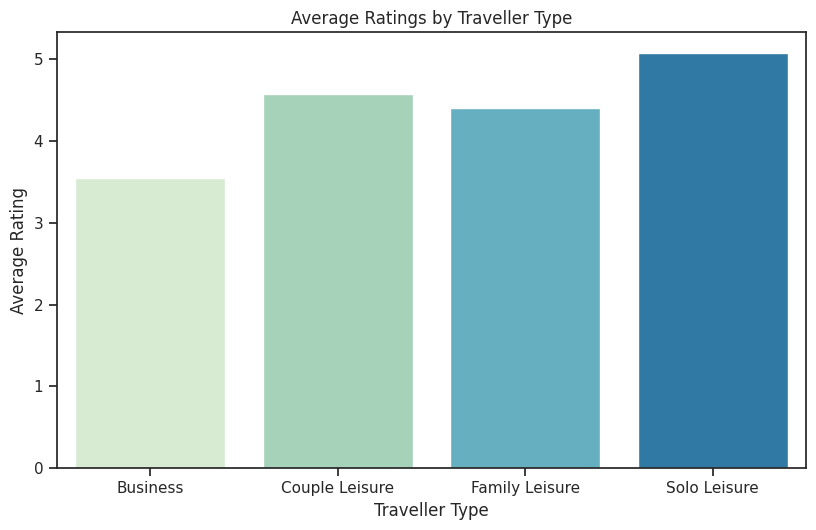

In [ ]:
# Visualization setup
plt.figure(figsize=(16, 10))
sns.set_theme(style="ticks", palette = 'Set2')

# Average Ratings by Traveller Type
plt.subplot(2, 2, 1)
sns.barplot(x=avg_rating_by_traveller_type.index, y=avg_rating_by_traveller_type.values , palette='GnBu')
plt.title('Average Ratings by Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-129-81f8c39e564c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_class.index, y=avg_rating_by_class.values  , palette='GnBu')


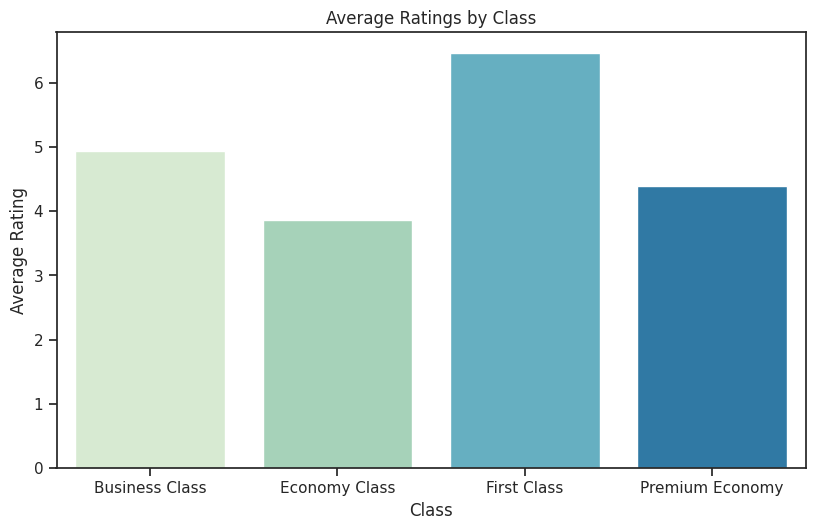

In [ ]:
# Visualization setup
plt.figure(figsize=(16, 10))


# Average Ratings by Traveller Class
plt.subplot(2, 2, 1)
sns.barplot(x=avg_rating_by_class.index, y=avg_rating_by_class.values  , palette='GnBu')
plt.title('Average Ratings by Class')
plt.xlabel('Class')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2.	Evaluate the influence of holiday booking time on customer behaviour.

In [ ]:
# filtering the data to correctly include rows where 'Flying_month' is not missing
correct_filtered_data = data_new[data_new['Flying_month'].notna()]


# Now, let's check the unique values in the 'Flying_month' column again
correct_unique_flying_months = correct_filtered_data['Flying_month'].unique()
correct_unique_flying_months


array(['18-Dec', '22-Apr', '16-May', '17-Apr', '22-Oct', '23-Feb',
       '16-Aug', '17-Jun', '18-Oct', '15-Sep', '16-Mar', '15-May',
       '18-May', '19-Sep', '18-Jun', '15-Dec', '99-Mar', '18-Aug',
       '22-Nov', '17-Aug', '17-Mar', '19-May', '18-Sep', '17-Jan',
       '19-Feb', '20-Jan', '20-May', '16-Sep', '02-Oct', '16-Jan',
       '18-Jan', '19-Jan', '22-Jan', '23-Jan', '16-Feb', '17-Feb',
       '18-Feb', '20-Feb', '18-Mar', '20-Mar', '22-Mar', '23-Mar',
       '16-Apr', '18-Apr', '19-Apr', '20-Apr', '21-Apr', '23-Apr',
       '17-May', '22-May', '23-May', '15-Jun', '19-Jun', '20-Jun',
       '21-Jun', '22-Jun', '23-Jun', '15-Jul', '16-Jul', '17-Jul',
       '18-Jul', '19-Jul', '15-Aug', '19-Aug', '21-Aug', '14-Sep',
       '17-Sep', '21-Sep', '22-Sep', '15-Oct', '16-Oct', '17-Oct',
       '19-Oct', '20-Oct', '15-Nov', '16-Nov', '17-Nov', '18-Nov',
       '19-Nov', '21-Nov', '16-Dec', '22-Dec', '22-Jul', '15-Apr',
       '12-Aug', '15-Jan', '15-Mar', '14-Aug', '14-Jul', '14-O

In [ ]:
import calendar
import warnings
warnings.filterwarnings("ignore")

# Extracting month information from the 'Flying_month' values

# The month is the last three characters of the string
correct_filtered_data['Month'] = correct_filtered_data['Flying_month'].str[-3:]

# Map the abbreviated month names to their numerical representation
month_to_num_corrected = {month: index for index, month in enumerate(calendar.month_abbr) if month}
correct_filtered_data['Month_Num'] = correct_filtered_data['Month'].map(month_to_num_corrected)

# Check the distribution of flights across different months and calculate average rating per month
month_distribution_corrected = correct_filtered_data['Month_Num'].value_counts().sort_index()
average_monthly_rating_corrected = correct_filtered_data.groupby('Month_Num')['Rating'].mean()

month_distribution_corrected, average_monthly_rating_corrected


(Month_Num
 1      64
 2      58
 3     100
 4      83
 5     105
 6      98
 7      79
 8      96
 9      97
 10     74
 11     89
 12     95
 Name: count, dtype: int64,
 Month_Num
 1     3.093750
 2     3.120690
 3     3.090000
 4     2.819277
 5     3.314286
 6     2.612245
 7     2.810127
 8     3.312500
 9     3.381443
 10    3.594595
 11    3.258427
 12    3.294737
 Name: Rating, dtype: float64)

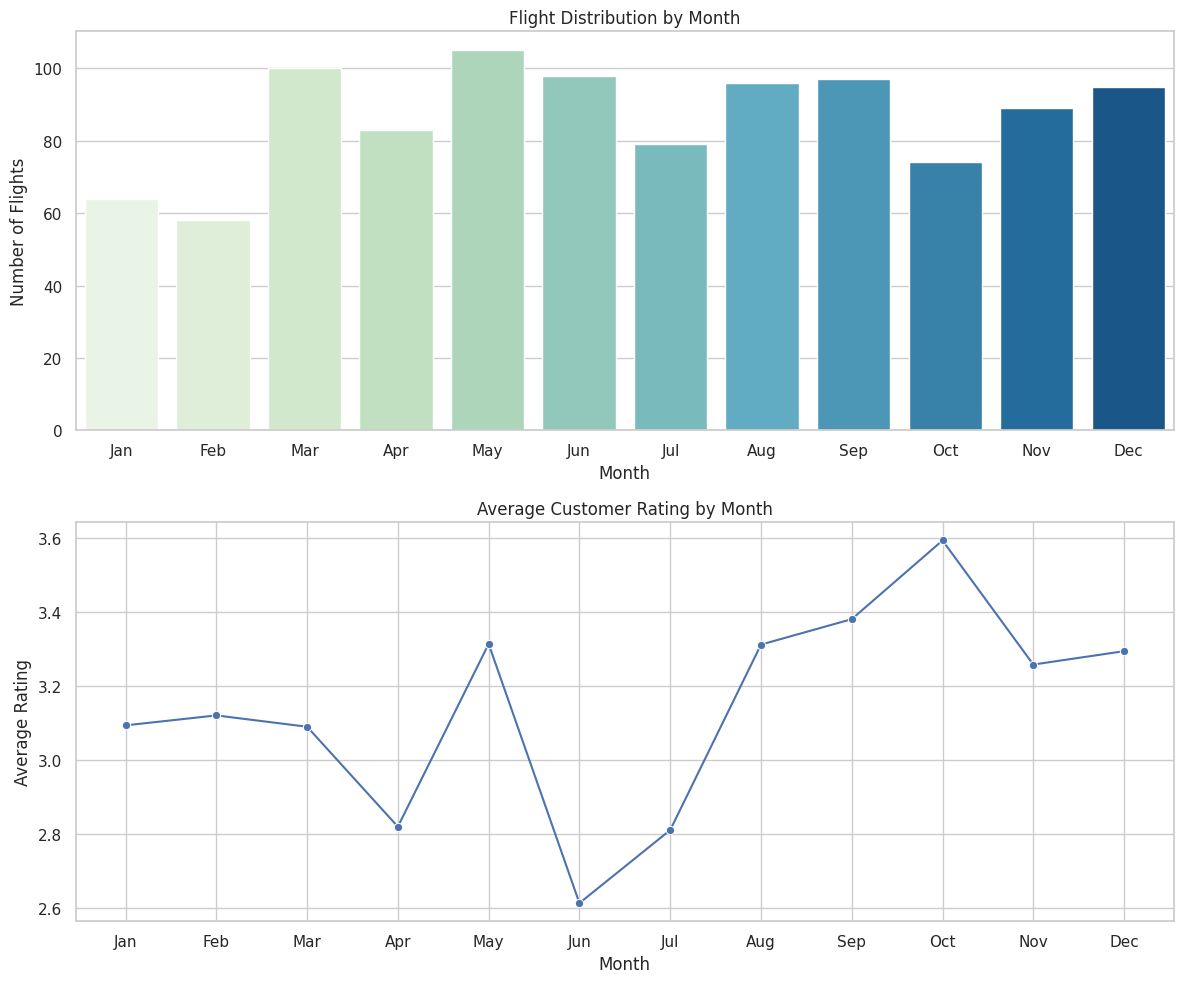

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Creating a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Bar chart for flight distribution by month
sns.barplot(x=month_distribution_corrected.index, y=month_distribution_corrected.values, ax=axes[0], palette='GnBu')
axes[0].set_title('Flight Distribution by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Flights')
axes[0].set_xticklabels([calendar.month_abbr[i] for i in month_distribution_corrected.index])

# Line chart for average customer rating by month
sns.lineplot(x=average_monthly_rating_corrected.index, y=average_monthly_rating_corrected.values, ax=axes[1], marker='o',palette='GnBu')
axes[1].set_title('Average Customer Rating by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Rating')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])

plt.tight_layout()
plt.show()

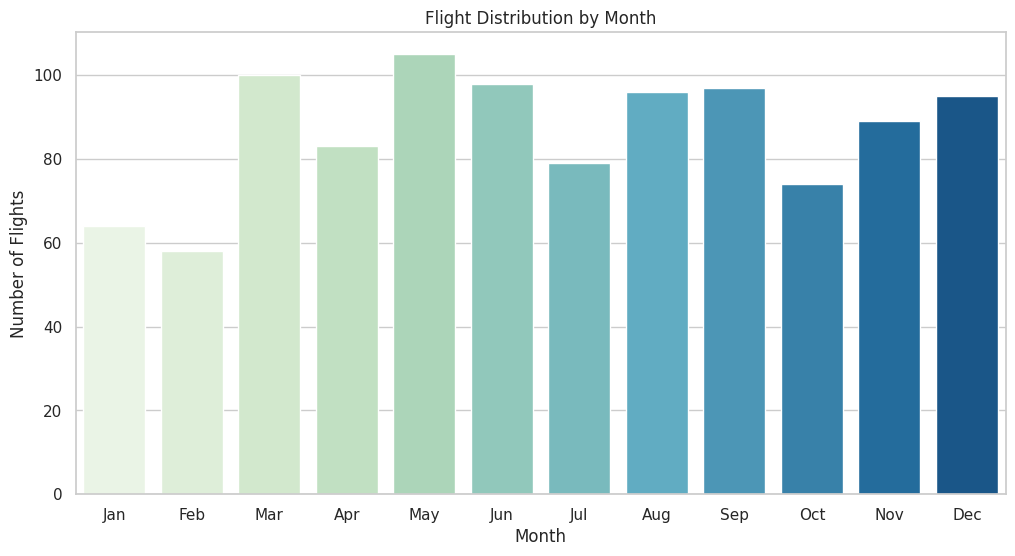

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.barplot(x=month_distribution_corrected.index, y=month_distribution_corrected.values ,palette='GnBu')
plt.title('Flight Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(ticks=range(12), labels=[calendar.month_abbr[i] for i in range(1, 13)])
plt.show()


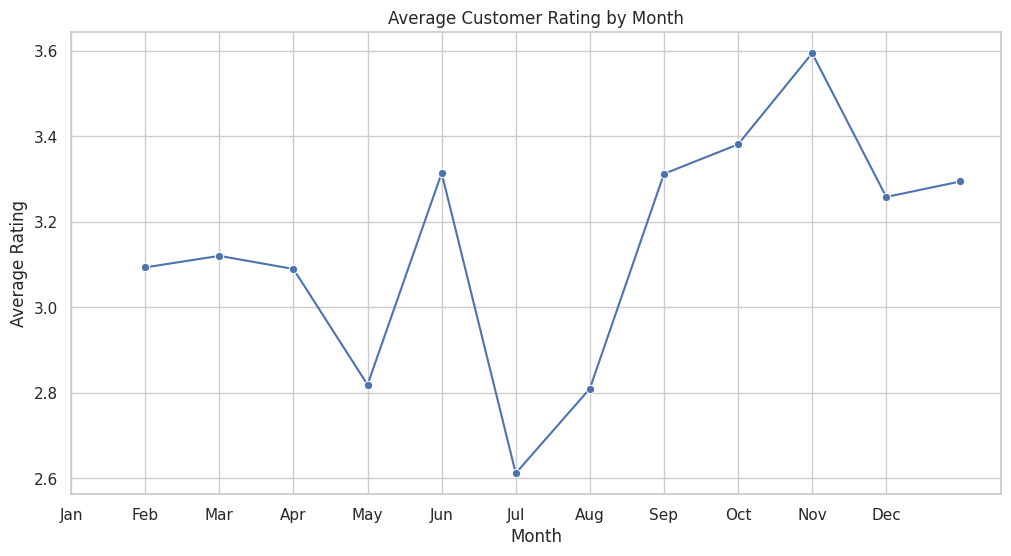

In [ ]:
# Second Plot - Average Customer Rating by Month
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_monthly_rating_corrected.index, y=average_monthly_rating_corrected.values, marker='o')
plt.title('Average Customer Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(ticks=range(12), labels=[calendar.month_abbr[i] for i in range(1, 13)])
plt.show()

#3.Find the likelihood of a successful holiday booking based on customer characteristics

In [ ]:
# Checking the distribution of ratings in the dataset
rating_distribution = correct_filtered_data['Rating'].describe()
rating_distribution


count    1038.000000
mean        3.143545
std         2.826656
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        10.000000
Name: Rating, dtype: float64

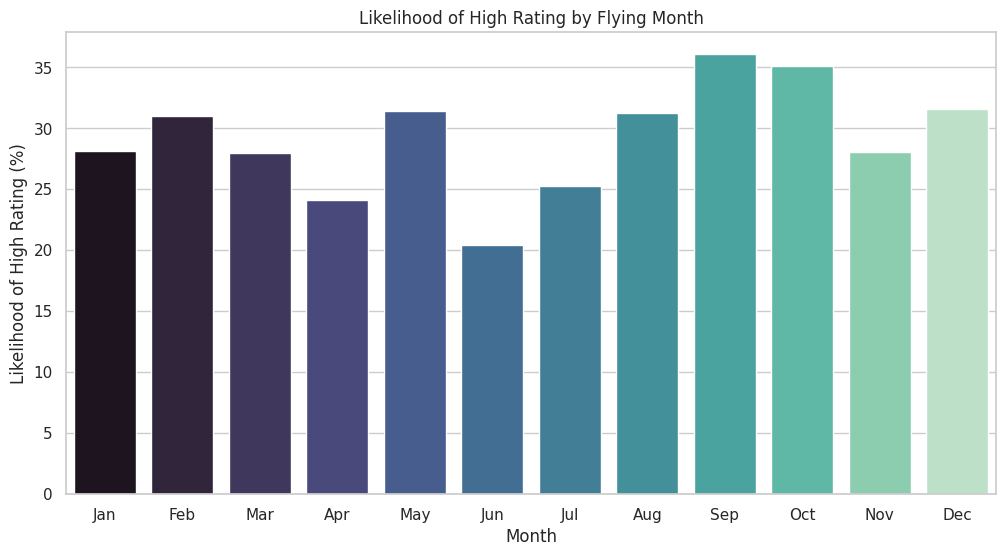

1     28.125000
2     31.034483
3     28.000000
4     24.096386
5     31.428571
6     20.408163
7     25.316456
8     31.250000
9     36.082474
10    35.135135
11    28.089888
12    31.578947
Name: Month_Num, dtype: float64

In [ ]:
# Segmenting the data based on the high rating threshold (4 or above)
high_ratings_data = correct_filtered_data[correct_filtered_data['Rating'] >= 4]

# Analyzing the distribution of high ratings across different months
high_ratings_monthly_distribution = high_ratings_data['Month_Num'].value_counts().sort_index()

# Normalizing the high ratings distribution by the total number of flights per month to get the likelihood
total_flights_per_month = correct_filtered_data['Month_Num'].value_counts().sort_index()
likelihood_high_rating = (high_ratings_monthly_distribution / total_flights_per_month) * 100

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x=likelihood_high_rating.index, y=likelihood_high_rating.values, palette="mako")
plt.title('Likelihood of High Rating by Flying Month')
plt.xlabel('Month')
plt.ylabel('Likelihood of High Rating (%)')
plt.xticks(ticks=range(12), labels=[calendar.month_abbr[i] for i in range(1, 13)])
plt.show()

likelihood_high_rating


# 4. Investigate the popularity of various routes

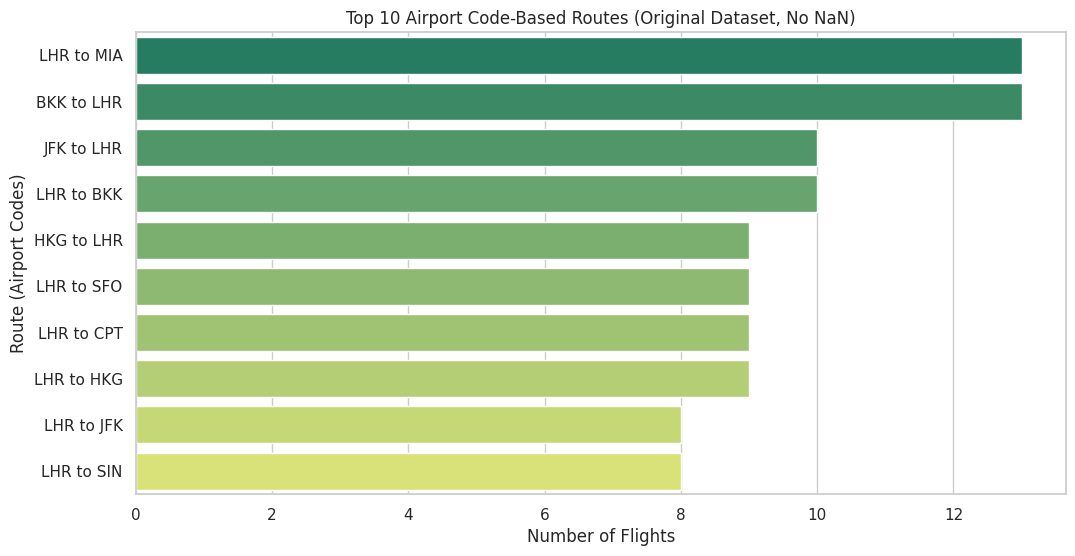

LHR to MIA    13
BKK to LHR    13
JFK to LHR    10
LHR to BKK    10
HKG to LHR     9
LHR to SFO     9
LHR to CPT     9
LHR to HKG     9
LHR to JFK     8
LHR to SIN     8
Name: Route, dtype: int64

In [ ]:
# Excluding rows with missing 'Route' values in the original dataset
original_data_no_nan = data_new[data_new['Route'].notna()]

# Filtering for routes represented by airport codes in the original dataset
original_airport_code_routes_no_nan = original_data_no_nan[original_data_no_nan['Route'].str.contains(r'^[A-Z]{3} to [A-Z]{3}$', regex=True)]

# Analyzing the popularity of airport code routes in the original dataset without NaN values
original_airport_code_route_popularity_no_nan = original_airport_code_routes_no_nan['Route'].value_counts()

# Top 10 airport code-based routes in the original dataset without NaN values
top_10_original_airport_code_routes_no_nan = original_airport_code_route_popularity_no_nan.head(10)

# Plotting the top 10 airport code-based routes from the original dataset without NaN values
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_original_airport_code_routes_no_nan.values, y=top_10_original_airport_code_routes_no_nan.index, palette="summer")
plt.title('Top 10 Airport Code-Based Routes (Original Dataset, No NaN)')
plt.xlabel('Number of Flights')
plt.ylabel('Route (Airport Codes)')
plt.show()

top_10_original_airport_code_routes_no_nan


This one should be used in assessment

<ipython-input-41-bafdcafd9bc5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_data_no_nan['Route_City_Name'] = original_data_no_nan['Route'].apply(convert_airport_codes_to_city)


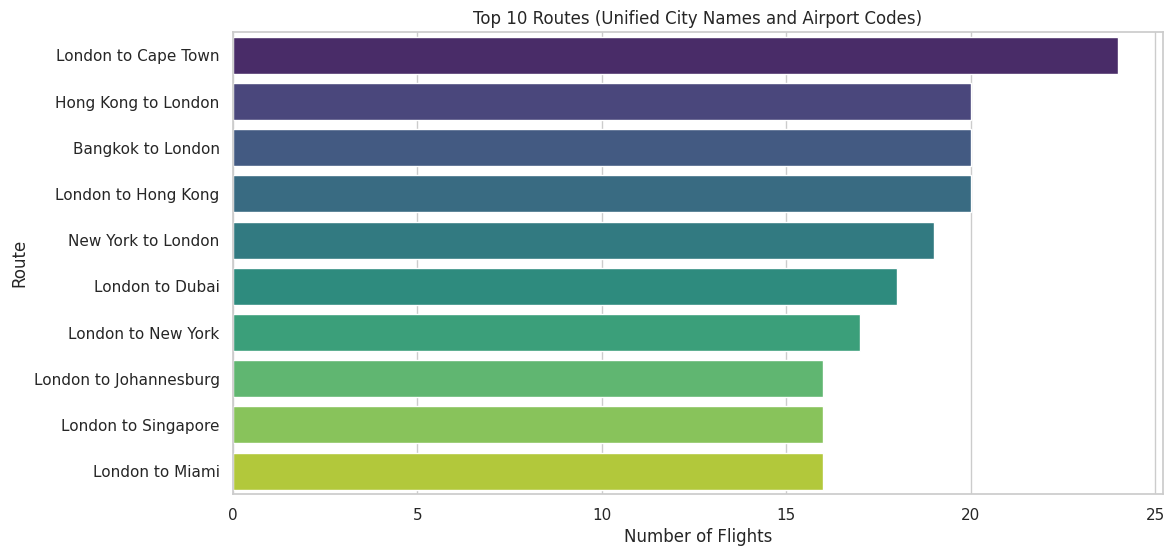

London to Cape Town       24
Hong Kong to London       20
Bangkok to London         20
London to Hong Kong       20
New York to London        19
London to Dubai           18
London to New York        17
London to Johannesburg    16
London to Singapore       16
London to Miami           16
Name: Route_City_Name, dtype: int64

In [ ]:
# Excluding rows with missing 'Route' values in the original dataset
original_data_no_nan = data_new[data_new['Route'].notna()]

# Manually mapping some well-known airport codes to city names
airport_code_to_city = {
    "LHR": "London", "BKK": "Bangkok", "MIA": "Miami",
    "JFK": "New York", "HKG": "Hong Kong", "SFO": "San Francisco",
    "CPT": "Cape Town", "SIN": "Singapore", "LGW": "London Gatwick",
    "DXB": "Dubai", "CDG": "Paris", "NAP": "Naples", "PRG": "Prague",
    "BUD": "Budapest", "LAS": "Las Vegas"
}

# Function to convert airport codes to city names in the route
def convert_airport_codes_to_city(route):
    for code, city in airport_code_to_city.items():
        route = route.replace(code, city)
    return route

# Applying the conversion to the 'Route' column in the original data
original_data_no_nan['Route_City_Name'] = original_data_no_nan['Route'].apply(convert_airport_codes_to_city)

# Analyzing the popularity of routes in the unified format
unified_route_popularity = original_data_no_nan['Route_City_Name'].value_counts()

# Top 10 routes in the unified format
top_10_unified_routes = unified_route_popularity.head(10)

# Plotting the top 10 routes in the unified format
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_unified_routes.values, y=top_10_unified_routes.index, palette="viridis")
plt.title('Top 10 Routes (Unified City Names and Airport Codes)')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.show()

top_10_unified_routes


# STASTICAL Tests

This section presents the code for hypothesis testing based on research questions in the context of the study and then based on statistical tests we present the final recommendations. 

In [ ]:
# Excluding rows with missing 'Traveller_type' values
new_airline_data_no_nan = data_new.dropna(subset=['Traveller_type'])

# Re-filtering data for business and leisure travelers
business_travelers_no_nan = new_airline_data_no_nan[new_airline_data_no_nan['Traveller_type'] == 'Business']['Rating']
leisure_travelers_no_nan = new_airline_data_no_nan[new_airline_data_no_nan['Traveller_type'].str.contains('Leisure')]['Rating']

# Ensuring that the 'Rating' column contains only numeric values and dropping NaNs
business_ratings_no_nan = pd.to_numeric(business_travelers_no_nan, errors='coerce').dropna()
leisure_ratings_no_nan = pd.to_numeric(leisure_travelers_no_nan, errors='coerce').dropna()


**Shapiro Wilk Test for normality**

In [ ]:
from scipy.stats import shapiro

# Testing for normality using the Shapiro-Wilk test
# Business travelers' ratings
shapiro_test_business = shapiro(business_ratings_no_nan)

# Leisure travelers' ratings
shapiro_test_leisure = shapiro(leisure_ratings_no_nan)

shapiro_test_business, shapiro_test_leisure

(ShapiroResult(statistic=0.8452683091163635, pvalue=3.534128409826342e-24),
 ShapiroResult(statistic=0.8816855549812317, pvalue=5.59996925610488e-38))

**Mann Whitney U test a non parametric test **

In [ ]:
from scipy.stats import mannwhitneyu

# Conducting the Mann-Whitney U test
u_statistic, u_p_value = mannwhitneyu(business_ratings_no_nan, leisure_ratings_no_nan, alternative='two-sided')

u_statistic, u_p_value


(542946.0, 3.0507929986040537e-15)